## FARS Dataset - Machine Learning Modeling

In [ ]:
# Imports the required basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
!pip install pmlb
from pmlb import fetch_data
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.feature_selection import mutual_info_classif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Fetches the raw dataset from library and assign variables
X,y = fetch_data('fars',return_X_y=True)

### Basic Data Exploration and Data Preprocessing

In [ ]:
# Checks the dimensions of predictors and target variables
print(X.shape)
print(y.shape)

(100968, 29)
(100968,)


In [ ]:
# Checks variable type
type(X)

numpy.ndarray

In [ ]:
# Change the vairable type to pandas dataframe
X = pd.DataFrame(X)

# Displays top 10 rows
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,34,1,1,3,7,2,2,9,1,...,2,0,2,0,5,0,27,29,19,17
1,0,20,1,1,3,7,9,2,9,1,...,2,0,2,0,5,0,27,29,19,17
2,0,43,1,1,3,5,4,0,0,0,...,2,0,2,0,5,0,27,29,19,4
3,0,38,0,6,6,5,4,0,0,0,...,2,0,2,0,6,2,27,29,19,11
4,0,50,1,1,3,5,9,0,0,1,...,2,0,2,0,5,2,27,29,19,4
5,0,40,0,1,3,5,4,0,0,1,...,2,0,2,0,6,2,27,29,19,11
6,0,50,1,1,3,7,4,0,0,1,...,2,0,2,0,6,0,27,29,19,11
7,0,69,0,6,6,7,4,2,9,1,...,2,0,2,0,5,0,27,29,19,4
8,0,94,1,7,8,7,11,0,0,1,...,2,0,2,0,5,0,43,29,19,17
9,0,47,1,1,3,5,4,0,0,1,...,2,0,2,0,6,0,27,29,19,11


In [ ]:
# Splits dataset to train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
# Checks number of unique values
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([    7, 29521, 10597,   217, 13980,  9690,  6051,   614]))

In [ ]:
# Checks number of unique values
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([    2, 12595,  4475,    82,  6027,  4200,  2623,   287]))

In [ ]:
# Prints dimensions of each dataframe
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(70677, 29)
(70677,)
(30291, 29)
(30291,)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


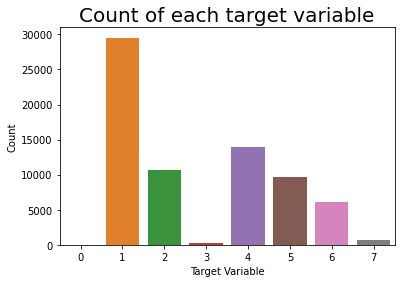

In [ ]:
# Display a graph with count of target variables in train data
sns.countplot(y_train)
plt.title("Count of each target variable", fontsize=20)
plt.xlabel("Target Variable")
plt.ylabel("Count")
plt.show()

In [ ]:
# Over samples the minority class using SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote= smote.fit_resample(x_train, y_train)

# Checks number of unique values
print(np.unique(y_train_smote, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([29521, 29521, 29521, 29521, 29521, 29521, 29521, 29521]))


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


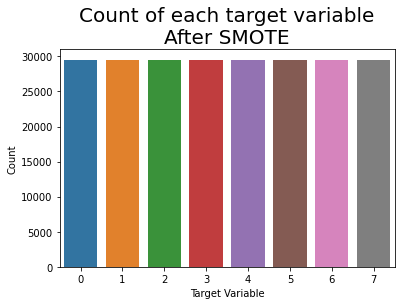

In [ ]:
# Display a graph with count of target variables in train data after SMOTE
sns.countplot(y_train_smote)
plt.title("Count of each target variable\nAfter SMOTE", fontsize=20)
plt.xlabel("Target Variable")
plt.ylabel("Count")
plt.show()

In [ ]:
# Prints dimensions of each dataframe
print(x_train_smote.shape)
print(y_train_smote.shape)

(236168, 29)
(236168,)


In [ ]:
# Scals the dataframe and returns as dataframe
mm = MinMaxScaler()
x_train = pd.DataFrame(mm.fit_transform(x_train_smote))
x_test = pd.DataFrame(mm.transform(x_test))

In [ ]:
# Reassigning a variable
y_train = y_train_smote

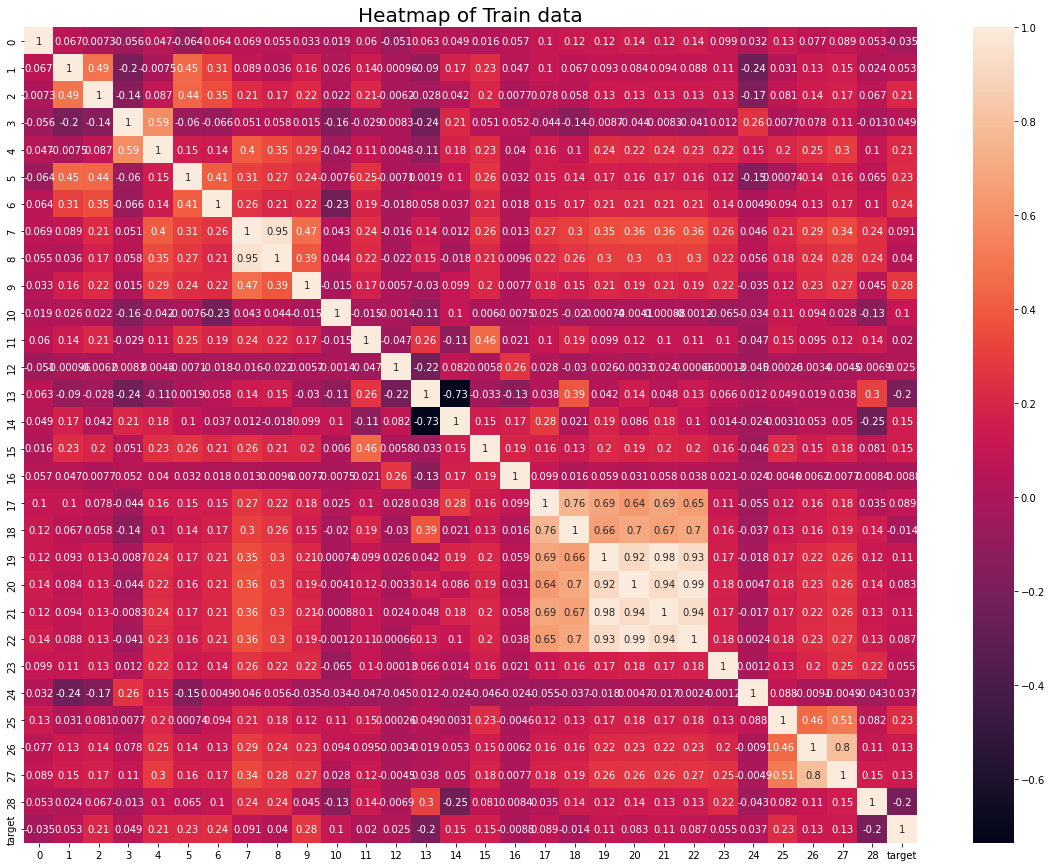

In [ ]:
# Crate new dataframe
heatmap_df = x_train.copy()
heatmap_df["target"] = y_train

# Perform correlation calculation
cor = heatmap_df.corr()

# Display correlation plot
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True)
plt.title("Heatmap of Train data", fontsize=20)
plt.show()

In [ ]:
# Creating multiple train and test data for muliple models
x_train_dt = x_train
x_test_dt = x_test

x_train_xgb = x_train
x_test_xgb = x_test

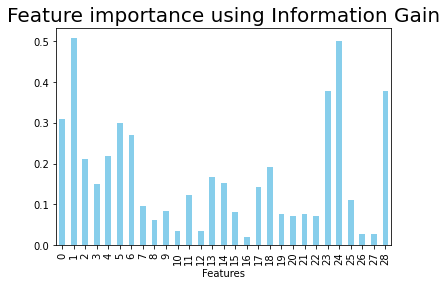

In [ ]:
# Display feature importance using Information theory
core = mutual_info_classif(x_train, y_train)
imp_features = pd.Series(core, X.columns[0:len(X.columns)])
imp_features.plot(kind="bar", color = "skyblue")
plt.title("Feature importance using Information Gain", fontsize=20)
plt.xlabel("Features")
plt.show()

### RandomForest Classification Model

In [ ]:
# Selects Features using machine learning models
sfs = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1), k_features=(1,20), forward=True, floating=False, verbose=2,
                               scoring="accuracy", cv=5).fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:  7.9min finished

[2023-01-26 05:29:09] Features: 1/20 -- score: 0.3735942265356944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed: 12.5min finished

[2023-01-26 05:41:40] Features: 2/20 -- score: 0.5290598538104863[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 12.5min finished

[2023-01-26 05:54:12] Features: 3/20 -- score: 0.649702783570953[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [ ]:
# Displays the selected features
columns_fs = list(sfs.k_feature_names_)
columns_fs

[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 13, 14, 15, 18, 21, 23, 24, 28]

In [ ]:
# Displays the overall accuracy for feature selection
sfs.k_score_

0.9098185763419874

In [ ]:
# Displays the feaute selection process output in dataframe format
sfs_cv = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_cv

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.3713638480755388, 0.37470889613414066, 0.37...",0.373594,"(1,)",0.0019,0.001478,0.000739
2,"(1, 24)","[0.5149045179319981, 0.530528856332303, 0.5341...",0.52906,"(1, 24)",0.009222,0.007175,0.003588
3,"(1, 23, 24)","[0.6368717449294999, 0.6511199559639242, 0.654...",0.649703,"(1, 23, 24)",0.008345,0.006492,0.003246
4,"(0, 1, 23, 24)","[0.7363551678875386, 0.7478087818097133, 0.751...",0.749255,"(0, 1, 23, 24)",0.008989,0.006994,0.003497
5,"(0, 1, 4, 23, 24)","[0.7758182665029428, 0.7904899013422535, 0.800...",0.794502,"(0, 1, 4, 23, 24)",0.013414,0.010437,0.005218
6,"(0, 1, 4, 5, 23, 24)","[0.8071727992547741, 0.8273066011771182, 0.839...",0.831036,"(0, 1, 4, 5, 23, 24)",0.01667,0.01297,0.006485
7,"(0, 1, 4, 5, 6, 23, 24)","[0.8316678663674472, 0.8525426599483423, 0.866...",0.857678,"(0, 1, 4, 5, 6, 23, 24)",0.018488,0.014385,0.007192
8,"(0, 1, 4, 5, 6, 14, 23, 24)","[0.8469111233433544, 0.8688021340559766, 0.888...",0.876563,"(0, 1, 4, 5, 6, 14, 23, 24)",0.021593,0.0168,0.0084
9,"(0, 1, 2, 4, 5, 6, 14, 23, 24)","[0.8528813989922513, 0.8788796206122709, 0.899...",0.886348,"(0, 1, 2, 4, 5, 6, 14, 23, 24)",0.023953,0.018636,0.009318
10,"(0, 1, 2, 4, 5, 6, 14, 18, 23, 24)","[0.8590210441631029, 0.8834102553245543, 0.904...",0.892026,"(0, 1, 2, 4, 5, 6, 14, 18, 23, 24)",0.024036,0.018701,0.009351


In [ ]:
# changing the dataframe to only features selected by feature selection process
x_train = x_train[columns_fs]
x_test = x_test[columns_fs]

In [ ]:
# Display dimensions
x_train.shape, x_test.shape

((236168, 18), (30291, 18))

In [ ]:
# Creats instance for model
rfc=RandomForestClassifier(random_state=42)

# Model hyperparameters
param_grid = { 
    'n_estimators': [200,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [15,18,20,30],
    'criterion' :['gini', 'entropy']
}

# Executes grid search for best result
grid_search = GridSearchCV(estimator = rfc,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)

C:\Users\Jashwant Anandan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
23 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jashwant Anandan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jashwant Anandan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 474, in fit
    trees = Parallel(
  File "C:\Users\Jashwant Anandan\anaconda3\lib\site-packages\joblib\parallel.py", line 1088, in __call__
    while self.dispatch_one_batch(iterator):
  File

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 18, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='accuracy')

In [ ]:
# Displays the overall grid search accuracy
grid_search.best_score_

0.9074939564349105

In [ ]:
# Displays the best parameters for the model obtained by grid search
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [ ]:
# Implementing a new classifier with grid search parameters
classifier_gs = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth=30, random_state = 0)
# Trains the model with training data
classifier_gs.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)

In [ ]:
# predicts the output with test predictor variables
y_pred_rf = classifier_gs.predict(x_test)

# Display classification model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00     12595
           2       0.56      0.56      0.56      4475
           3       0.37      0.45      0.41        82
           4       0.86      0.91      0.88      6027
           5       0.45      0.48      0.46      4200
           6       0.33      0.26      0.29      2623
           7       0.61      0.79      0.69       287

    accuracy                           0.77     30291
   macro avg       0.52      0.55      0.54     30291
weighted avg       0.77      0.77      0.77     30291



In [ ]:
# Creating and Displaying a confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm,
                     index = [0,1,2,3,4,5,6,7],
                     columns = [0,1,2,3,4,5,6,7])
plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True, fmt ='g',cmap = 'Blues')
plt.title('Confusion Matrix for Random Forest - FARS')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Decision Tree Classification Model

In [ ]:
# Display dimensions
x_train_dt.shape, x_test_dt.shape, x_train_xgb.shape, x_test_xgb.shape

((236168, 29), (30291, 29), (236168, 29), (30291, 29))

In [ ]:
# Initialise variables for feature selection
min_features = 4
classifier = DecisionTreeClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Initialise RFECV feature selection
rfe_cv = RFECV(
    estimator=classifier,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features,
    n_jobs=2,
)

# Train the model
rfe_cv.fit(x_train_dt, y_train)

# Display selected number of features
print(f"Optimal number of features: {rfe_cv.n_features_}")

Optimal number of features: 27


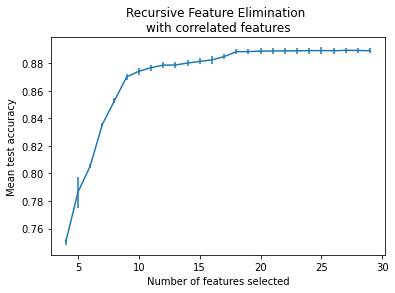

In [ ]:
# Get the average score for feature selection
n_scores = len(rfe_cv.cv_results_["mean_test_score"])

# Plot graph to understannd feature selection
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features, n_scores + min_features),
    rfe_cv.cv_results_["mean_test_score"],
    yerr=rfe_cv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \n Decision Tree")
plt.show()

In [ ]:
# Get and Display the chosen feeatures
chosen_features = rfe_cv.get_support(indices=True)
chosen_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 28], dtype=int64)

In [ ]:
# Filter the chosen features as train and test data
x_train_dt = x_train_dt[chosen_features]
x_test_dt = x_test_dt[chosen_features]

# Display Dimensions
x_train_dt.shape, x_test_dt.shape

((236168, 27), (30291, 27))

In [ ]:
# Initialise Prinicipal component Analysis and classifier model
pca = decomposition.PCA()
classifier = DecisionTreeClassifier(random_state=1)

# Setup a pipeline
pipe = Pipeline(steps=[('pca', pca),('classifier', classifier)])

# Parameters for tuning
n_components = [15,16,18,20,23,25]
criterion = ['gini', 'entropy']
max_depth = [15,18,25,30]

# Set up the parameters
parameters = dict(pca__n_components=n_components,
                      classifier__criterion=criterion,
                      classifier__max_depth=max_depth)

# Perform gridsearch through pipeline
gridsearch = GridSearchCV(pipe, parameters)

# Train the model
gridsearch.fit(x_train_dt, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=1))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [15, 18, 25, 30],
                         'pca__n_components': [15, 16, 18, 20, 23, 25]})

In [ ]:
# Display grid search output details
print('Best Criterion:', gridsearch.best_estimator_.get_params()['classifier__criterion'])
print('Best max_depth:', gridsearch.best_estimator_.get_params()['classifier__max_depth'])
print('Best Number Of Components:', gridsearch.best_estimator_.get_params()['pca__n_components'])
print(); print(gridsearch.best_estimator_.get_params()['classifier'])

Best Criterion: entropy
Best max_depth: 30
Best Number Of Components: 20

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=1)


In [ ]:
# Initialise and train PCA model to train and test data
main_pca = decomposition.PCA(n_components=20)
x_train_pca = main_pca.fit_transform(x_train_dt)
x_test_pca = main_pca.transform(x_test_dt)

In [ ]:
# Display dimension and data
print(x_train_pca.shape)
x_train_pca

(236168, 20)


array([[-4.42214446e-01, -1.33418957e-01,  2.47938621e-01, ...,
         1.18032074e-01,  1.65671985e-01, -3.54216152e-01],
       [-2.18626381e-01, -3.01359499e-01, -1.68135481e-01, ...,
        -2.89851131e-02,  3.77288179e-02,  4.96408648e-03],
       [-9.54730113e-02, -5.37239906e-01,  4.43257483e-01, ...,
        -1.53407483e-01,  9.99423470e-02,  1.39152330e-01],
       ...,
       [ 4.71844325e-02, -6.36176977e-01, -6.99140025e-01, ...,
        -1.70521426e-02,  4.66880190e-02,  1.51595984e-02],
       [ 2.42810213e+00, -2.98385278e-02, -7.44367427e-01, ...,
         9.51606109e-03, -5.55665870e-02, -2.48654050e-02],
       [-1.45361006e-01, -6.80088650e-01, -3.57886474e-01, ...,
        -7.21217537e-03, -1.64386457e-02,  1.67467265e-03]])

In [ ]:
# Display dimension and data
print(x_test_pca.shape)
x_test_pca

(30291, 20)


array([[ 1.50922190e+00,  7.50661710e-01,  1.35785284e-01, ...,
         3.42350243e-03, -1.64341250e-01, -1.04619479e-01],
       [-3.43861516e-01, -4.36374610e-01,  2.74927407e-01, ...,
        -1.60731810e-02, -3.13552876e-03, -1.27087301e-02],
       [-4.27565378e-01,  7.65166653e-01,  3.42063898e-03, ...,
         1.41067844e-03,  1.50379851e-02,  1.45798205e-02],
       ...,
       [-1.44183500e-01, -5.11754391e-01,  4.01563571e-02, ...,
         6.78056165e-02, -1.78966429e-01, -2.41951588e-02],
       [ 1.35291209e+00,  9.33023703e-01,  4.68330761e-01, ...,
        -5.68045446e-02,  3.91846464e-02, -1.06313564e-02],
       [-2.26610698e-01,  3.73024984e-01, -4.51062070e-01, ...,
         2.36775144e-02, -1.00684805e-02,  1.70605249e-02]])

In [ ]:
# Initialise and train model
main_classifier = DecisionTreeClassifier(random_state=1, criterion="entropy", max_depth=30)
main_classifier.fit(x_train_pca, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=1)

In [ ]:
# Predict target variables for test data
y_pred_dt = main_classifier.predict(x_test_pca)

# Display classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.99      0.99     12595
           2       0.51      0.48      0.50      4475
           3       0.18      0.44      0.26        82
           4       0.85      0.81      0.83      6027
           5       0.41      0.42      0.41      4200
           6       0.25      0.27      0.26      2623
           7       0.48      0.75      0.58       287

    accuracy                           0.73     30291
   macro avg       0.46      0.52      0.48     30291
weighted avg       0.74      0.73      0.74     30291



In [ ]:
# Initialise and display Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
cm_df = pd.DataFrame(cm,
                     index = [0,1,2,3,4,5,6,7],
                     columns = [0,1,2,3,4,5,6,7])
plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True, fmt ='g',cmap = 'Blues')
plt.title('Confusion Matrix for Decision Tree - FARS')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### XGBClassifier Model

In [ ]:
# Getting the Dimensions
x_train_xgb.shape, x_test_xgb.shape, y_train.shape, y_test.shape

((236168, 29), (30291, 29), (236168,), (30291,))

In [ ]:
# Initialise variables for feature selection
classifier_xgb = XGBClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Initialise RFECV feature selection
rfe_cv_xgb = RFECV(
    estimator=classifier_xgb,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=4,
    n_jobs=5,
)

# Train the model
rfe_cv_xgb.fit(x_train_xgb, y_train)

# Display selected number of features
print(f"Optimal number of features: {rfe_cv_xgb.n_features_}")

Optimal number of features: 27


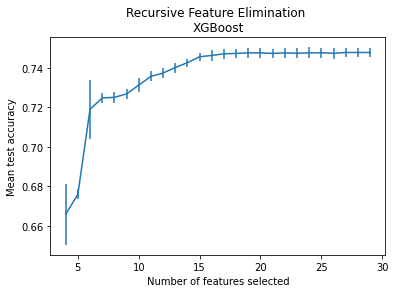

In [ ]:
# Get the average score for feature selection
n_scores = len(rfe_cv_xgb.cv_results_["mean_test_score"])

# Plot graph to understannd feature selection
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(4, n_scores + 4),
    rfe_cv_xgb.cv_results_["mean_test_score"],
    yerr=rfe_cv_xgb.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nXGBoost")
plt.show()

In [ ]:
# Get and Display the chosen feeatures
chosen_features = rfe_cv_xgb.get_support(indices=True)
chosen_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 28])

In [ ]:
# Filter the chosen features as train and test data
x_train_xgb = x_train_xgb[chosen_features]
x_test_xgb = x_test_xgb[chosen_features]

# Display Dimensions
x_train_xgb.shape, x_test_xgb.shape

((236168, 27), (30291, 27))

In [ ]:
# Initialise the model
classifier_xgb = XGBClassifier(learning_rate = 0.1, n_estimators=350, subsample=0.8)

# Train the model
classifier_xgb.fit(x_train_xgb, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
# Predict target class using test data
y_pred_xgb = classifier_xgb.predict(x_test_xgb)

# Display classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00     12595
           2       0.63      0.48      0.55      4475
           3       0.17      0.72      0.27        82
           4       0.85      0.93      0.89      6027
           5       0.45      0.68      0.54      4200
           6       0.49      0.06      0.10      2623
           7       0.43      0.86      0.57       287

    accuracy                           0.78     30291
   macro avg       0.50      0.59      0.49     30291
weighted avg       0.79      0.78      0.76     30291



In [ ]:
# Initialise and display Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cm_df = pd.DataFrame(cm,
                     index = [0,1,2,3,4,5,6,7],
                     columns = [0,1,2,3,4,5,6,7])
plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True, fmt ='g',cmap = 'Blues')
plt.title('Confusion Matrix for XGBClassifier - FARS')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()